In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from glob import glob
import os
import matplotlib.pyplot as plt
import subprocess

In [2]:
def get_all_file_paths(root_dir):
    to_return = []
    current_level_dfs = glob(f"{root_dir}/*Df.csv")
    if len(current_level_dfs) > 0:
        to_return += [df_path for df_path in current_level_dfs]
    else:
        for subdir in os.listdir(root_dir):
            full_dir = f"{root_dir}/{subdir}" 
            if os.path.isdir(full_dir):
                to_return += get_all_file_paths(full_dir)
    return to_return

In [3]:
os.chdir("../simulation_scripts")
os.system("./RunEffectSizeSimsSameArmsTSPPD.sh")
os.chdir("../simulation_analysis_scripts")

save_dir = '../simulation_saves/TSPPDNoEffectResampleFast'

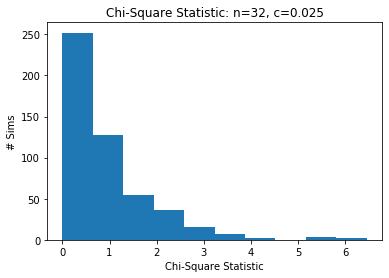

cutoff: 2.6181818181818186
chi square mean: 0.8734359490381011


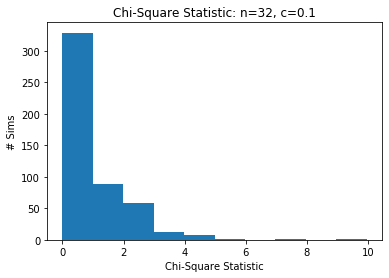

cutoff: 3.173076923076924
chi square mean: 0.9457028347790933


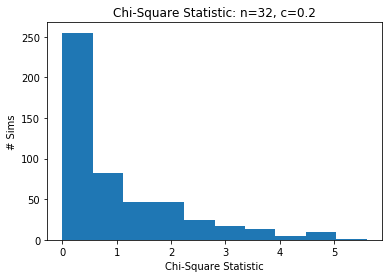

cutoff: 3.4082458894488967
chi square mean: 0.9952133055590552


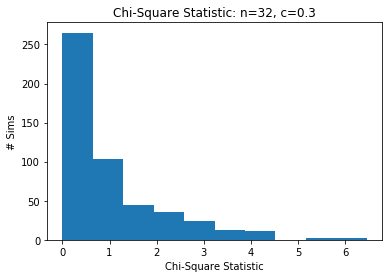

cutoff: 3.4082458894488967
chi square mean: 0.9426407604630046


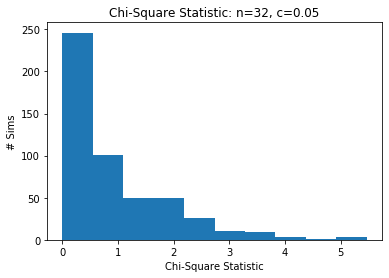

cutoff: 2.8613756613756607
chi square mean: 0.9002282118713969


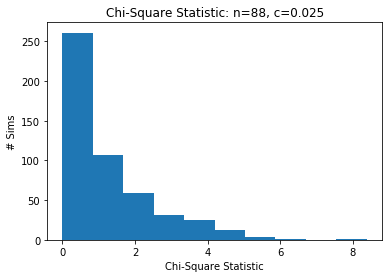

cutoff: 3.7314723774351095
chi square mean: 1.1687172436463673


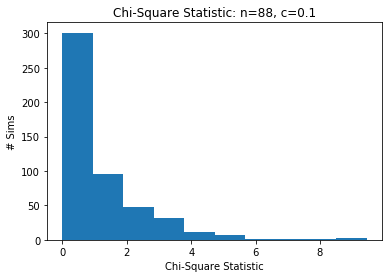

cutoff: 3.775573893220951
chi square mean: 1.1215202202123336


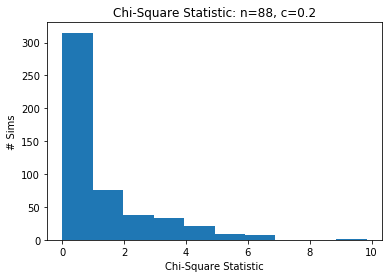

cutoff: 4.3796782927217714
chi square mean: 1.217945952532324


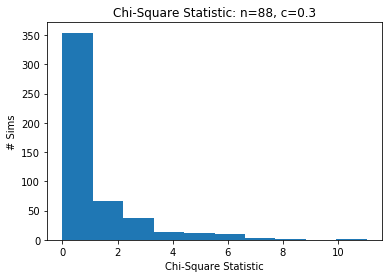

cutoff: 4.842718696674072
chi square mean: 1.0773807875392711


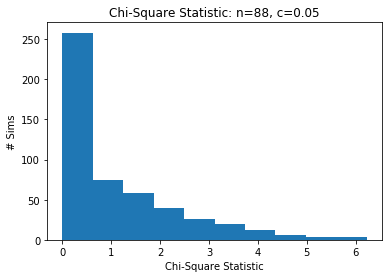

cutoff: 3.7314723774351095
chi square mean: 1.0780460117482362


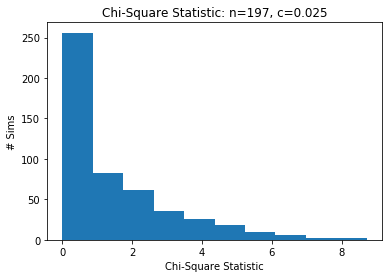

cutoff: 4.904599380492412
chi square mean: 1.4596772038208308


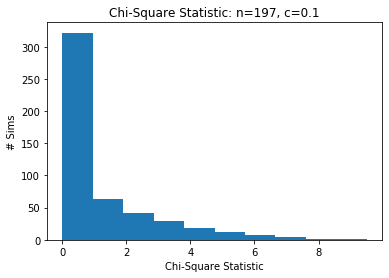

cutoff: 5.025143477765693
chi square mean: 1.2239763641288905


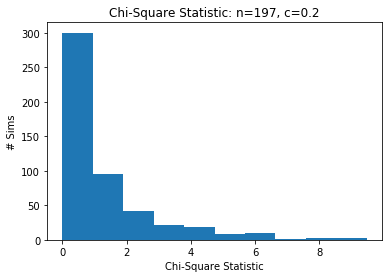

cutoff: 4.6907675454106315
chi square mean: 1.2018079766901248


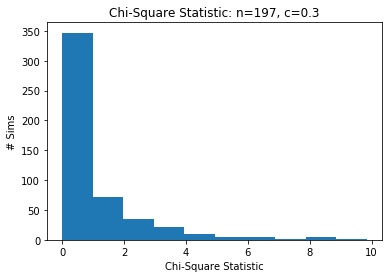

cutoff: 3.947005742411815
chi square mean: 1.0422765890857066


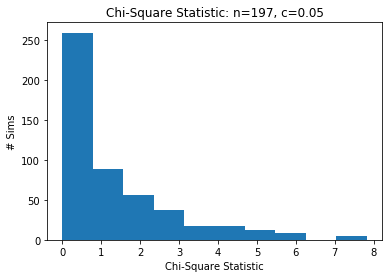

cutoff: 4.701326695814871
chi square mean: 1.3056802321355703


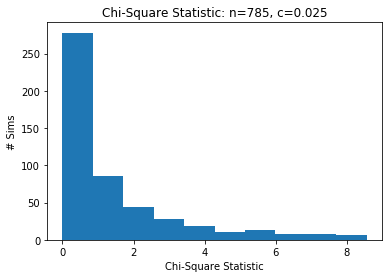

cutoff: 5.8010430011015455
chi square mean: 1.4238270225551586


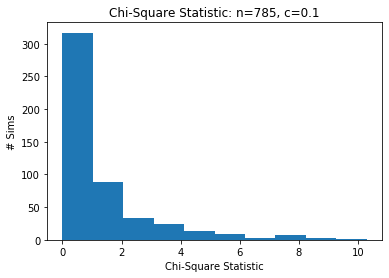

cutoff: 4.760995870059103
chi square mean: 1.2181203363972894


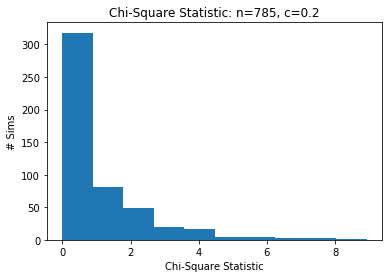

cutoff: 3.7926883856410463
chi square mean: 1.0432008029343645


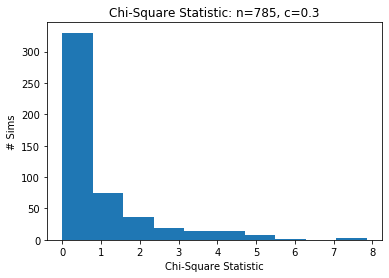

cutoff: 3.9564521433311306
chi square mean: 0.9221533225987798


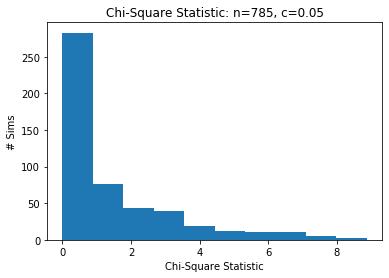

cutoff: 5.5884140919947525
chi square mean: 1.4387666143053395


In [4]:
num_sims = 500
arm_prob = 0.5
means = {}
cutoffs = {}
for n in (32, 88, 197, 785):
    for c in (0.025, 0.1, 0.2, 0.3, 0.05):
        try:
            file_path = glob(save_dir + f"/num_sims={num_sims}armProb={arm_prob}/N={n}c={c}/*.csv")[0]
        except IndexError:
            print(save_dir + f"/num_sims={num_sims}armProb={arm_prob}/N={n}c={c}/*.csv", "not found")
            continue
        df_sims = pd.read_csv(file_path)[:num_sims]
        plt.hist(df_sims['stat'])
        plt.title(f"Chi-Square Statistic: n={n}, c={c}")
        plt.xlabel("Chi-Square Statistic")
        plt.ylabel("# Sims")
        plt.savefig(f'../simulation_analysis_saves/chi_square_cutoff/chi_square_histogram_{n}.png')
        plt.show()
        cutoff = df_sims['stat'].sort_values().reset_index()['stat'][int(0.95 * num_sims)]
        print(f"cutoff: {cutoff}")
        cutoffs[f'n={n}_c={c}'] = cutoff
        print(f"chi square mean: {df_sims['stat'].mean()}")
        means[f'n={n}_c={c}'] = df_sims['stat'].mean()

In [161]:
# delete all the simulation saves
for save_dir in save_dirs:
    os.system(f"rm -rf {save_dir}")

In [76]:
# re-run the simulations
test_scripts = ["RunEffectSizeSimsSameArms_fixedbs.sh", "RunEffectSizeSims.sh"]
os.chdir("../simulation_scripts")
for test_script in test_scripts:
    os.system(f"./{test_script}")
os.chdir("../simulation_analysis_scripts")

In [165]:
save_dir= ['../simulation_saves/TSPPDNoEffectResampleFast', '../simulation_saves/TSPPDIsEffectResampleFast']

In [77]:
# compute false positive rate
save_dir = '../simulation_saves/TSPPDNoEffectResampleFast'
num_sims = 2000
arm_prob = 0.5
df_fp = pd.DataFrame()
for n in (32, 88, 197, 785):
    for c in (0.025, 0.1, 0.2, 0.3, 0.05):
        try:
            file_path = glob(save_dir + f"/num_sims={num_sims}armProb={arm_prob}/N={n}c={c}/*.csv")[0]
        except IndexError:
            print(save_dir + f"/num_sims={num_sims}armProb={arm_prob}/N={n}c={c}/*.csv", "not found")
            continue
        df_sims = pd.read_csv(file_path)[:num_sims]
        cutoff = cutoffs[f'n={n}_c={c}']
        df_positives = df_sims[df_sims['stat'] > cutoff]
        percent_positive = len(df_positives)/num_sims
        print(f"# above chi-square_cutoff: {len(df_positives)}")
        print(f"% of sims positive: {len(df_positives)/num_sims}")
        df_fp = df_fp.append({'effect_size': 0, 'n': n, 'c': c, 'percent_positive': percent_positive}, ignore_index=True)

KeyError: 'n=32_c=0.025'

In [78]:
# compute true positive rate
save_dir = '../simulation_saves/TSPPDIsEffectResampleFast'
num_sims = 500
arm_prob = 0.5
df_power = pd.DataFrame()
for es in (0.1, 0.2, 0.3, 0.5):
    for c in (0.025, 0.1, 0.2, 0.3, 0.05):
        try:
            file_path = glob(save_dir + f"/num_sims={num_sims}armProb={arm_prob}/es={es}c={c}/*.csv")[0]
        except IndexError:
            print(save_dir + f"/num_sims={num_sims}armProb={arm_prob}/N={n}c={c}/*.csv", "not found")
            continue
        df_sims = pd.read_csv(file_path)
        for n in df_sims['num_steps'].drop_duplicates():
            if f'n={n}_c={c}' not in cutoffs:
                print(f"n: {n}")
                continue
            cutoff = cutoffs[f'n={n}_c={c}']
            df_sims_n = df_sims[df_sims['num_steps'] == n]
            df_positives = df_sims_n[df_sims_n['stat'] > cutoff]
            percent_positive = len(df_positives)/num_sims
            print(f"# above chi-square_cutoff: {len(df_positives)}")
            print(f"% of sims positive: {len(df_positives)/num_sims}")
            df_power = df_power.append({'effect_size': es, 'n': n, 'c': c, 'percent_positive': percent_positive}, ignore_index=True)

n: 393
n: 785
n: 1570
n: 3140
n: 393
n: 785
n: 1570
n: 3140
n: 393
n: 785
n: 1570
n: 3140
n: 393
n: 785
n: 1570
n: 3140
n: 393
n: 785
n: 1570
n: 3140
n: 99
n: 197
n: 394
n: 788
n: 99
n: 197
n: 394
n: 788
n: 99
n: 197
n: 394
n: 788
n: 99
n: 197
n: 394
n: 788
n: 99
n: 197
n: 394
n: 788
n: 44
n: 88
n: 176
n: 352
n: 44
n: 88
n: 176
n: 352
n: 44
n: 88
n: 176
n: 352
n: 44
n: 88
n: 176
n: 352
n: 44
n: 88
n: 176
n: 352
n: 16
n: 32
n: 64
n: 128
n: 16
n: 32
n: 64
n: 128
n: 16
n: 32
n: 64
n: 128
n: 16
n: 32
n: 64
n: 128
n: 16
n: 32
n: 64
n: 128


In [10]:
df_all = pd.concat([df_fp, df_power])
df_all.to_csv('../simulation_analysis_saves/chi_square_cutoff/chi_square_cutoff_results.csv')

In [3]:
df_all = pd.read_csv('../simulation_analysis_saves/chi_square_cutoff/chi_square_cutoff_results.csv')

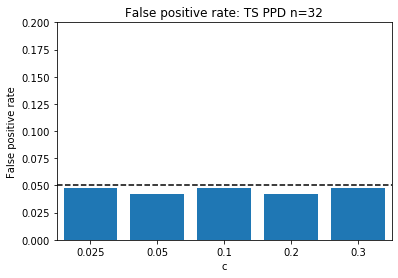

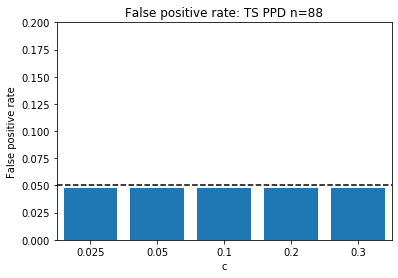

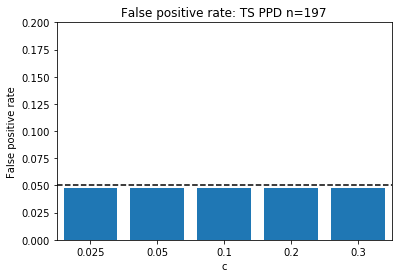

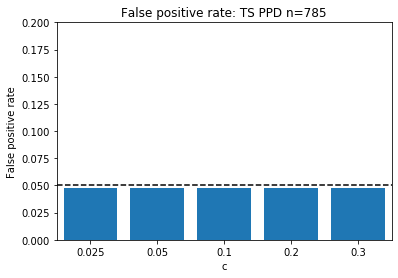

In [47]:
# plot false positive rate
df_fp = df_all[df_all['effect_size'] == 0]
x_labels = []
for n in df_fp['n'].drop_duplicates():
    x_labels.append(n)
    df_n = df_fp[df_fp['n'] == n].sort_values(by='c').reset_index()
    fig_n, ax_n = plt.subplots()
    i = 0
    x_points = range(len(df_n))
    x_labels = list(df_n['c'])
    y_points = df_n['percent_positive']
    ax_n.bar(x_points, y_points)
    ax_n.set_ylim(bottom=0, top=0.2)
    ax_n.set_xlim(left=-0.5, right=len(df_n)-0.5)
    ax_n.set_xticks(range(len(df_n)))
    ax_n.set_xticklabels(x_labels)
    ax_n.plot(ax_n.get_xlim(), (0.05, 0.05), color='black', linestyle='--')
    ax_n.set_title(f"False positive rate: TS PPD n={int(n)}")
    ax_n.set_xlabel("c")
    ax_n.set_ylabel("False positive rate")

    Unnamed: 0      c  effect_size      n  percent_positive
20           0  0.025          0.1  785.0             0.356
21           1  0.100          0.1  785.0             0.684
22           2  0.200          0.1  785.0             0.808
23           3  0.300          0.1  785.0             0.826
24           4  0.050          0.1  785.0             0.474
    Unnamed: 0      c  effect_size      n  percent_positive
25           5  0.025          0.2  197.0             0.446
26           6  0.100          0.2  197.0             0.554
27           7  0.200          0.2  197.0             0.668
28           8  0.300          0.2  197.0             0.796
29           9  0.050          0.2  197.0             0.508
    Unnamed: 0      c  effect_size     n  percent_positive
30          10  0.025          0.3  88.0             0.602
31          11  0.100          0.3  88.0             0.678
32          12  0.200          0.3  88.0             0.716
33          13  0.300          0.3  88.0    

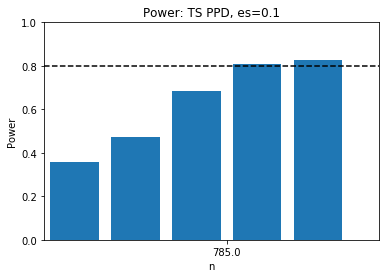

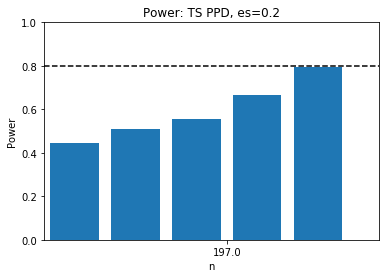

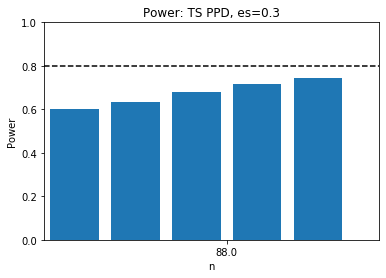

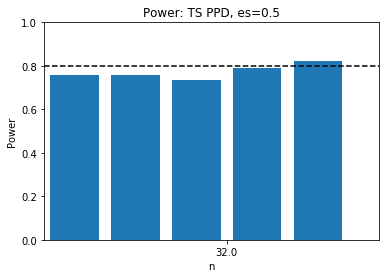

In [72]:
# plot power
df_pow = df_all[df_all['effect_size'] != 0]
for es in df_pow['effect_size'].drop_duplicates():
    df_es = df_pow[df_pow['effect_size'] == es]
    fig_es, ax_es = plt.subplots()
    starting_x = 0
    x_ticks = []
    print(df_es)
    for n in df_es['n'].drop_duplicates().sort_values():
        df_n = df_es[df_es['n'] == n].sort_values(by='c').reset_index()
        i = 0
        x_points = [x+starting_x for x in range(len(df_n))]
        y_points = df_n['percent_positive']
        ax_es.bar(x_points, y_points)
        ax_es.set_ylim(bottom=0, top=1)
        #ax_es.set_xlim(left=-0.5, right=len(df_n)-0.5)
        #ax_n.set_xticks(range(len(df_n)))
        #ax_n.set_xticklabels(x_labels)
        starting_x += len(df_es)*2
        x_ticks.append(starting_x - 1.5 * len(df_es))
    
    ax_es.set_title(f"Power: TS PPD, es={es}")
    ax_es.set_xlabel("n")
    ax_es.set_ylabel("Power")
    ax_es.set_xticks(x_ticks)
    ax_es.set_xticklabels(df_es['n'].drop_duplicates().sort_values())
    ax_es.set_xlim(left=-0.5, right=starting_x-len(df_es))
    ax_es.plot(ax_es.get_xlim(), (0.8, 0.8), color='black', linestyle='--')